In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TUFF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TUFF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TUFF\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
import re
import nltk
from sklearn.model_selection import learning_curve
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from collections import Counter

In [2]:
df = pd.read_csv('petitions_combined.csv')


In [3]:
df.head()

,created_at,id,links.self,action,background,additional_details,state,signature_count,updated_at,rejected_at,...,government_response.details,government_response.created_at,government_response.updated_at,debate.debated_on,debate.transcript_url,debate.video_url,debate.debate_pack_url,debate.public_engagement_url,debate.debate_summary_url,debate.overview
0,2020-03-02 12:06:20.235000+00:00,300000,https://petition.parliament.uk/petitions/30000...,Protect the Environment – support carbon neutr...,"In November 2019, Members of the UK Youth Parl...",To preserve this world for the next generation...,closed,1604,2021-08-04T14:50:59.852Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03 11:21:56.566000+00:00,300005,https://petition.parliament.uk/petitions/30000...,Bring Hailsham’s roads back to a their former ...,“My aim is to get Hailsham streets and roads b...,I am wanting to start a petition because the r...,rejected,21,2020-03-03T17:43:08.225Z,2020-03-03T17:42:56.620Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-03 11:22:53.628000+00:00,300007,https://petition.parliament.uk/petitions/30000...,Give holiday caravan/lodge owners the same sta...,Owners of holiday caravans and lodges need the...,As a multi-million pound consumer industry wit...,closed,13478,2020-09-05T23:00:08.415Z,NaN,...,"Caravan sites in England, unless exempted, are...",2020-06-03T16:57:01.622Z,2020-06-03T16:58:11.205Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-03 11:23:13.336000+00:00,300008,https://petition.parliament.uk/petitions/30000...,Increase the criteria for a successful referen...,"Referendums can and have been deeply divisive,...",I propose increasing the threshold to 60%+ of ...,rejected,6,2020-03-05T12:39:51.706Z,2020-03-05T12:39:47.015Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-03 11:23:23.361000+00:00,300009,https://petition.parliament.uk/petitions/30000...,Allow conference speakers to be able to speak ...,"As of right now, you require a Tier 5 visa to ...",This is a negative for the country as a whole ...,rejected,8,2020-03-04T10:53:14.872Z,2020-03-04T10:53:14.874Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(103958, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103958 entries, 0 to 103957
Data columns (total 34 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   created_at                        103958 non-null  object
 1   id                                103958 non-null  int64 
 2   links.self                        103958 non-null  object
 3   action                            103958 non-null  object
 4   background                        71112 non-null   object
 5   additional_details                95786 non-null   object
 6   state                             103958 non-null  object
 7   signature_count                   103958 non-null  int64 
 8   updated_at                        103958 non-null  object
 9   rejected_at                       38350 non-null   object
 10  opened_at                         65631 non-null   object
 11  closed_at                         65608 non-null   object
 12  mo

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
created_at,created_at,0.000000
id,id,0.000000
links.self,links.self,0.000000
action,action,0.000000
background,background,31.595452
additional_details,additional_details,7.860867
state,state,0.000000
signature_count,signature_count,0.000000
updated_at,updated_at,0.000000
rejected_at,rejected_at,63.110102


# Data cleaninng  

In [7]:
# Drop rows with missing values
df = df.dropna(subset=['action', 'background', 'additional_details', 'state'])

In [8]:
# Combine text features
df['text'] = df['action'] + ' ' + df['background'] + ' ' + df['additional_details']

In [9]:
# remove extra spaces
def remove_spaces(text):
    text=text.strip()
    text=text.split()
    return ' '.join(text)

In [10]:
# remove contractions
contraction = {'cause':'because',
              'aint': 'am not',
              'aren\'t': 'are not'}

def mapping_replacer(x,dic):
    for words in dic.keys():
        if ' ' + words + ' ' in x:
            x=x.replace(' '+ words +' ' ,' '+dic[words]+' ' )
    return x

In [11]:
from nltk.stem.lancaster import LancasterStemmer
nltk.LancasterStemmer
ls = LancasterStemmer()
lem = WordNetLemmatizer()
def lexicon_normalization(text):
    words = word_tokenize(text) 
    
    
    # 1- Stemming
    words_stem = [ls.stem(w) for w in words]
    
    # 2- Lemmatization
    words_lem = [lem.lemmatize(w) for w in words_stem]
    return words_lem


In [12]:
def clean_text(text):
    if isinstance(text, str):
        # Make text lowercase
        text = text.lower()
        # Remove text in square brackets
        text = re.sub(r'\[.*?\]', '', text)
        # Remove links
        text = re.sub(r'http\S+', '', text)
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Remove words containing numbers
        text = re.sub(r'\w*\d\w*', '', text)
        # Remove twitter handles
        text = re.sub('@[^\s]+', '', text)
        # Remove emojis
        text = text.encode('ascii', 'ignore').decode('ascii')
        # Remove hashtags
        text = re.sub(r'\B#\S+', '', text)
    
    return text

In [13]:
# Remove stop words
def remove_stopword(text):
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stopwords_dict])
    return text

In [14]:
# tokenize the text
def tokenise(text):
    words = word_tokenize(text) 
    return words

In [15]:
df['Text']=df['text'].apply(lambda x:clean_text(x))

In [16]:
df['Text'] = df['Text'].map(lambda x: re.sub(r'\W+', ' ', str(x)))
df['Text'] = df['Text'].replace(r'\W+', ' ', regex=True)

In [17]:
df['Text']=df['Text'].apply(lambda x: mapping_replacer(x, contraction))

In [18]:

df['Text']=df['Text'].apply(lambda x: remove_stopword(x))

In [19]:
df['Text']=df['Text'].apply(lambda x: lexicon_normalization(x))

In [20]:
data=df.copy()
l=[]
for i in data['Text']:
    str1 = " " 
    t=str1.join(i)
    l.append(t)
data['Text']=l   

# Exploratory data analysis

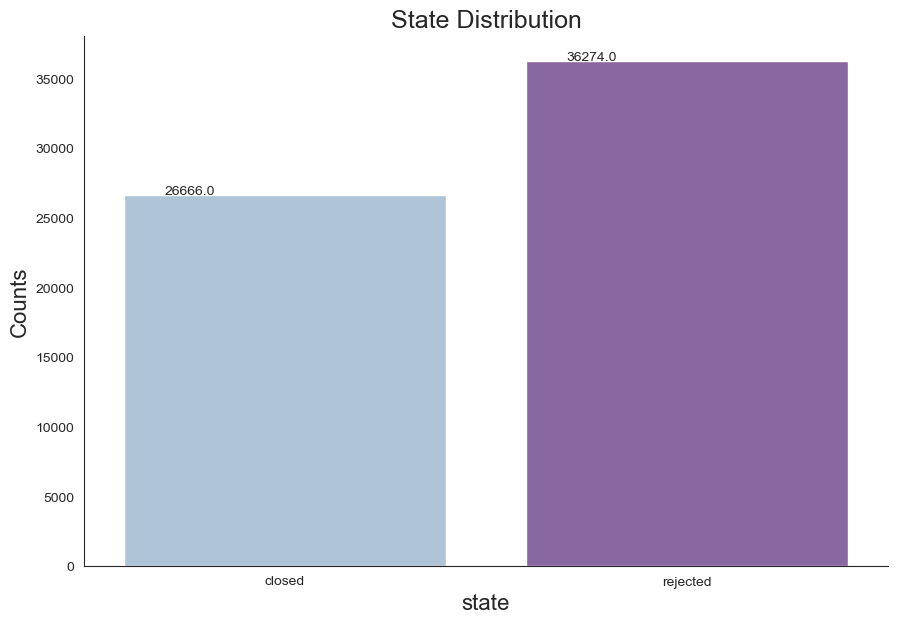

In [33]:
sns.set_style("white")
g = sns.catplot(x="state", data=data, kind="count",
                   palette="BuPu", height=6, aspect=1.5)
g.ax.xaxis.set_label_text("state",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Counts", fontdict= {'size':16})
g.ax.set_title("State Distribution",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+20))

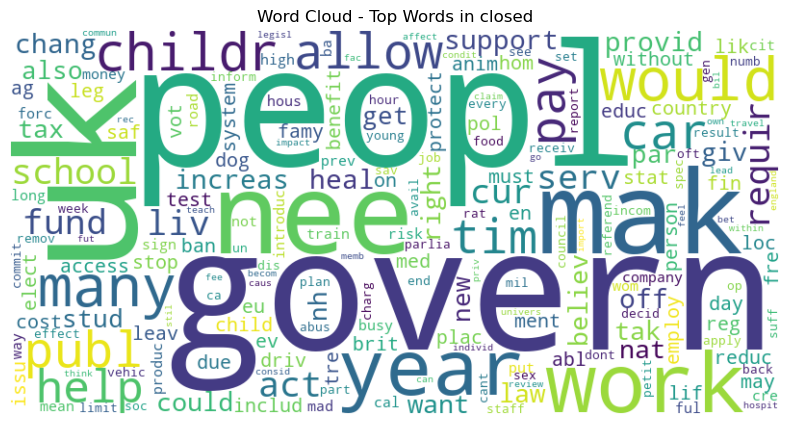

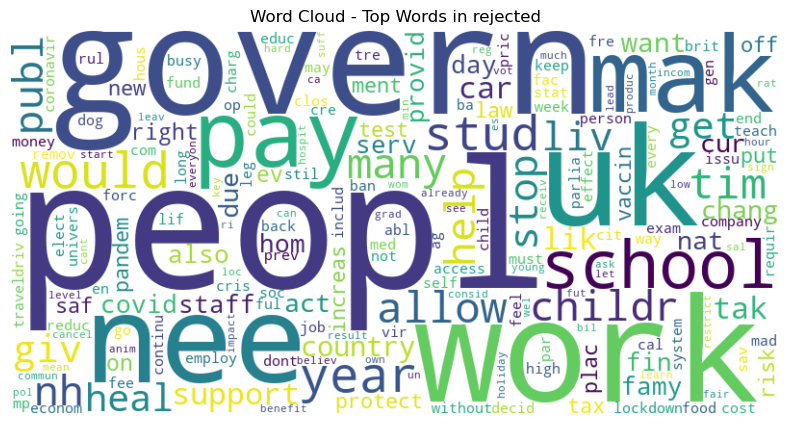

In [21]:
# Word frequency analysis and word clouds for each class
classes = data['state'].unique()

for label in classes:
    # Filter the data for the current class
    class_data = data[data['state'] == label]

    # Word frequency analysis
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(class_data['Text'])

    word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    word_freq_sum = word_freq.sum().sort_values(ascending=False)
    

    # Visualize word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_sum)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Top Words in {label}')
    plt.axis('off')
    plt.show()

# data preprocessing

In [22]:
 #Converting Tweet feature into a vector using TfidfVectorizer technique
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer =  TfidfVectorizer(max_features=6000)
X = vectorizer.fit_transform(data['Text'])
b=vectorizer.get_feature_names_out()

In [23]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
 #creating a dataframe of the array which was converted into a vector and concatinating it with other features
df_final = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()) 

In [25]:
data=data.reset_index(drop=True)

In [26]:
df=pd.concat([df_final,data[['state','departments']]],axis=1)

In [27]:
# One-hot encode the 'departments' column
df = pd.get_dummies(df, columns=['departments'], prefix='dept')

In [28]:
df['state'].value_counts()

state
rejected    36274
closed      26666
Name: count, dtype: int64

In [29]:
X=df.drop(['state'],axis=1)
y=df['state']


In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Model 1:LogisticRegression

Classification Report:
              precision    recall  f1-score   support

      closed       0.86      0.76      0.81      5414
    rejected       0.83      0.91      0.87      7174

    accuracy                           0.84     12588
   macro avg       0.85      0.83      0.84     12588
weighted avg       0.85      0.84      0.84     12588

Confusion Matrix:
[[4102 1312]
 [ 645 6529]]


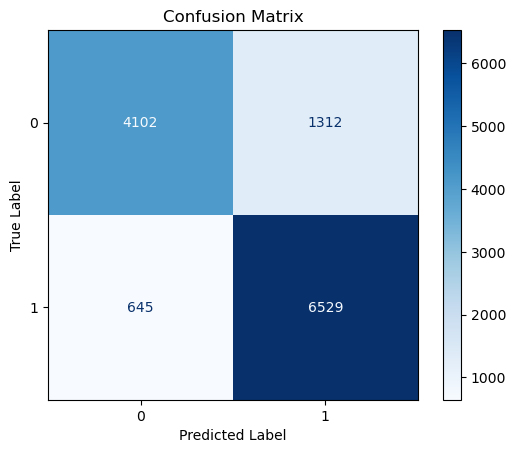

In [32]:
# Train the model
lr = LogisticRegression(random_state=1000)
lr.fit(X_train, y_train)

y_pred_lr=lr.predict(X_test)
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



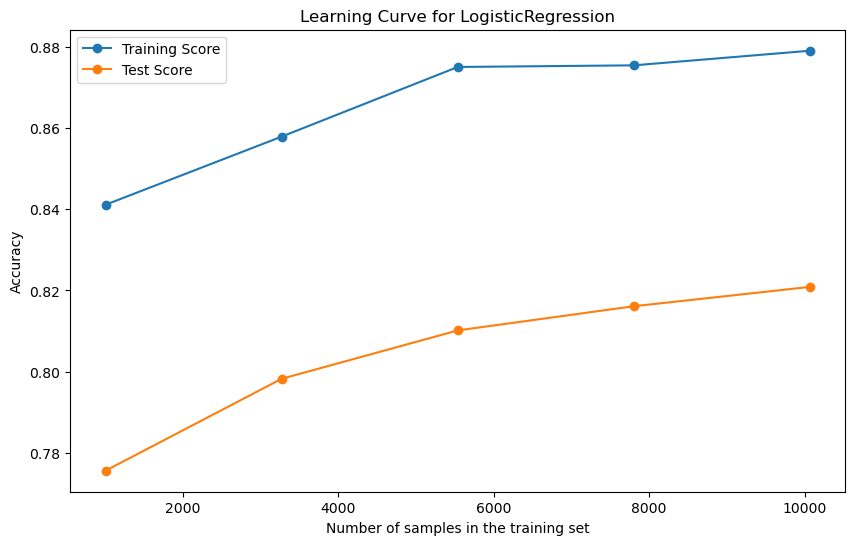

In [33]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_test,
    "y": y_test,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=1, test_size=0.2, random_state=0),  # Updated n_splits to 5
    "score_type": "both",
    "n_jobs": 1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

# No need for ax_idx since ax is a single Axes object
LearningCurveDisplay.from_estimator(lr, **common_params, ax=ax)

handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_title(f"Learning Curve for {lr.__class__.__name__}")

plt.show()

# Model 2: RandomForestClassifier

Classification Report:
              precision    recall  f1-score   support

      closed       0.91      0.72      0.80      5414
    rejected       0.82      0.95      0.88      7174

    accuracy                           0.85     12588
   macro avg       0.86      0.83      0.84     12588
weighted avg       0.86      0.85      0.85     12588

Confusion Matrix:
[[3887 1527]
 [ 378 6796]]


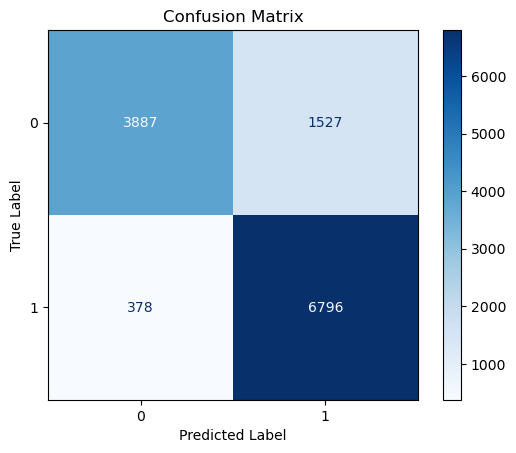

In [35]:
# Train the model
rf = RandomForestClassifier(random_state=1000)
rf.fit(X_train, y_train)

y_pred_rf=rf.predict(X_test)
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

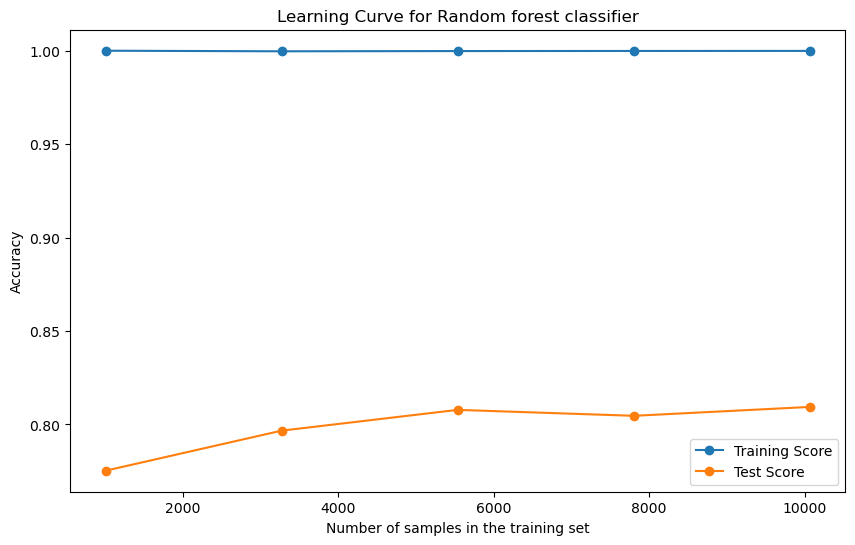

In [36]:


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_test,
    "y": y_test,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=1, test_size=0.2, random_state=0),  # Updated n_splits to 5
    "score_type": "both",
    "n_jobs": 1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

# No need for ax_idx since ax is a single Axes object
LearningCurveDisplay.from_estimator(rf, **common_params, ax=ax)

handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_title(f"Learning Curve for Random forest classifier")

plt.show()

# Model 3:GradientBoostingClassifier

Classification Report:
              precision    recall  f1-score   support

      closed       0.94      0.55      0.69      5414
    rejected       0.74      0.97      0.84      7174

    accuracy                           0.79     12588
   macro avg       0.84      0.76      0.77     12588
weighted avg       0.83      0.79      0.78     12588

Confusion Matrix:
[[2958 2456]
 [ 191 6983]]


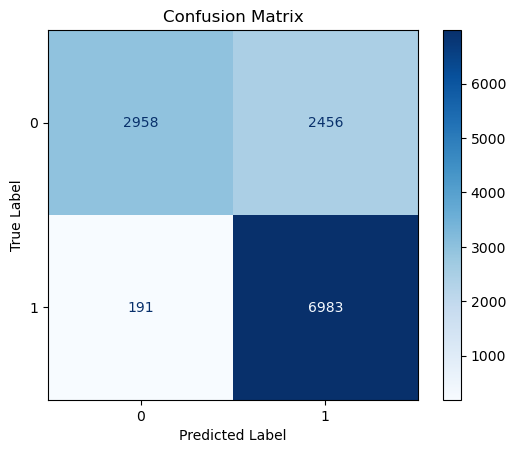

In [38]:
# Train the model
gb = GradientBoostingClassifier(random_state=1000)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)  

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_gb)
print(conf_matrix)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


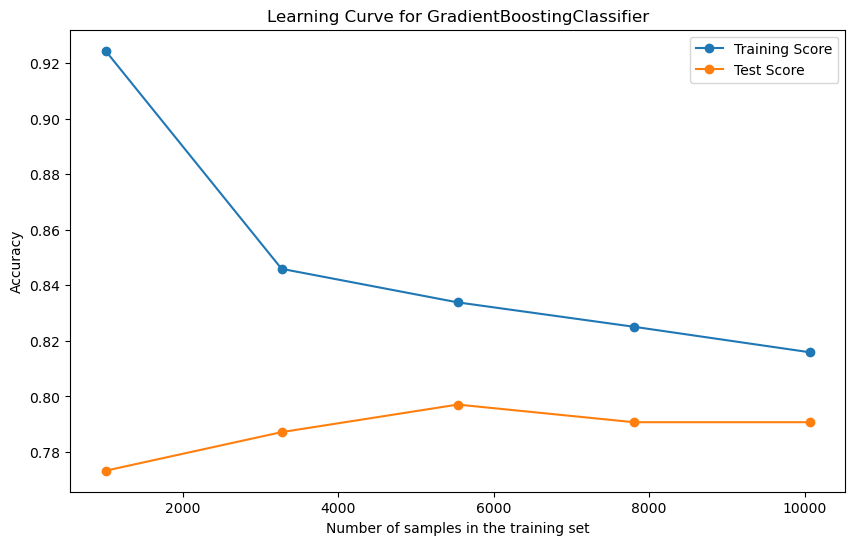

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_test,
    "y": y_test,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=1, test_size=0.2, random_state=0),  # Updated n_splits to 5
    "score_type": "both",
    "n_jobs": 1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

# No need for ax_idx since ax is a single Axes object
LearningCurveDisplay.from_estimator(gb, **common_params, ax=ax)

handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_title(f"Learning Curve for GradientBoostingClassifier")

plt.show()

# Model 4 : MultinomialNB

Classification Report:
              precision    recall  f1-score   support

      closed       0.88      0.64      0.74      5414
    rejected       0.78      0.94      0.85      7174

    accuracy                           0.81     12588
   macro avg       0.83      0.79      0.79     12588
weighted avg       0.82      0.81      0.80     12588

Confusion Matrix:
[[3466 1948]
 [ 461 6713]]


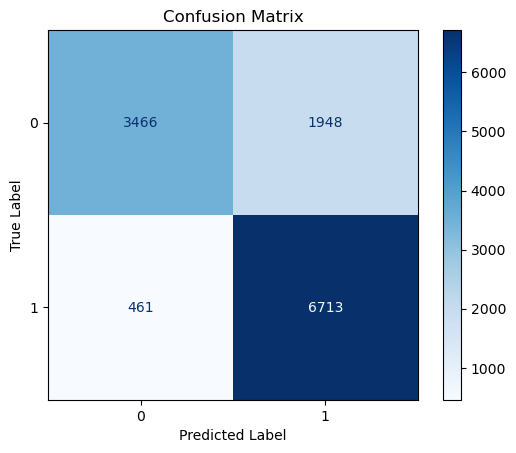

In [41]:
from sklearn.naive_bayes import MultinomialNB
# Train the model
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)  

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print(conf_matrix)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


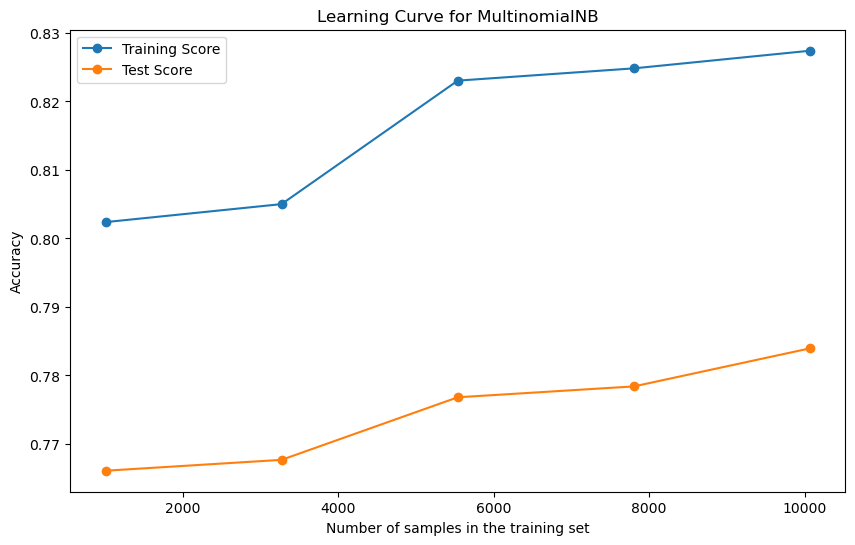

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_test,
    "y": y_test,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=1, test_size=0.2, random_state=0),  # Updated n_splits to 5
    "score_type": "both",
    "n_jobs": 1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

# No need for ax_idx since ax is a single Axes object
LearningCurveDisplay.from_estimator(nb, **common_params, ax=ax)

handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_title(f"Learning Curve for MultinomialNB")

plt.show()